In [4]:
!pip install scikit-learn
!pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.10.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.57.0-cp312-cp312-win_amd64.whl.metadata (104 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.1-cp312-cp312-win_amd64.whl (8.1 MB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.57.0-cp312-cp312-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl (71 kB)
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --------------------------- ------------ 1.8/2.7 MB 9.1 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 9.1 MB/s eta 0:00:00
Using cached pypa

In [5]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


In [25]:
X_train = []
y_train = [] 

data = pd.read_csv('./data/tic-tac-toe-full.data', header=None)

X = data.iloc[:, :9]
Y = data.iloc[:, 9] 

data.head()

,0,1,2,3,4,5,6,7,8,9
0,1,1,1,1,0,0,1,0,0,xwin
1,1,1,1,1,0,0,0,1,0,xwin
2,1,1,1,1,0,0,0,0,1,xwin
3,1,1,1,1,0,0,0,-1,-1,xwin
4,1,1,1,1,0,0,-1,0,-1,xwin


In [26]:
# Saber quantas linhas existem de cada classe
count_scenarios = pd.crosstab(index=data[9], columns="count")
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, stratify=Y)
count_scenarios



col_0,count
9,
hasgame,98
owin,316
tie,54
xwin,626


O melhor valor de k é: 10 com acurácia média de: 0.8514


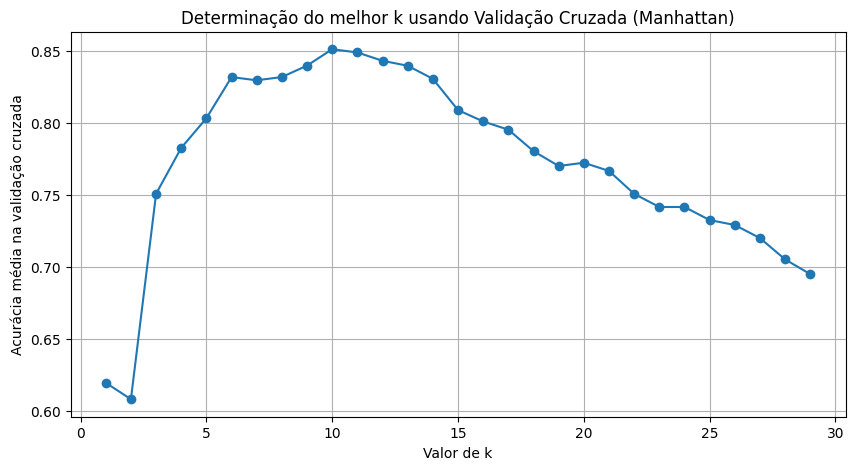

In [28]:

# Avaliar diferentes valores de k
k_range = range(1, 30)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    cv_scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    scores.append(cv_scores.mean())

# Encontrar o melhor valor de k
optimal_k = k_range[np.argmax(scores)]
print(f'O melhor valor de k é: {optimal_k} com acurácia média de: {max(scores):.4f}')

# Plotar gráfico de desempenho
plt.figure(figsize=(10, 5))
plt.plot(k_range, scores, marker='o')
plt.xlabel('Valor de k')
plt.ylabel('Acurácia média na validação cruzada')
plt.title('Determinação do melhor k usando Validação Cruzada (Manhattan)')
plt.grid(True)
plt.show()

In [23]:
k = 10
knn = KNeighborsClassifier(n_neighbors=k)

# Train the classifier
knn.fit(X_train, y_train)

y_prediction = knn.predict(X_test)
confusion_matrix(y_test, y_prediction)

array([[ 16,   0,   0,   4],
       [  4,  30,   0,  29],
       [  0,   4,   6,   1],
       [  1,   1,   1, 122]])

In [24]:
# Usando indexação padrão para arrays NumPy
ndtest = y_test.to_numpy()

acerto = 0
for i in range(len(y_prediction)):
    if y_prediction[i] == ndtest[i]:  # Indexação padrão para numpy arrays
        acerto += 1

print("Acuracia: ", acerto / len(y_prediction))
print(accuracy_score(y_test, y_prediction))
print(classification_report(y_test, y_prediction))

Acuracia:  0.7945205479452054
0.7945205479452054
              precision    recall  f1-score   support

     hasgame       0.76      0.80      0.78        20
        owin       0.86      0.48      0.61        63
         tie       0.86      0.55      0.67        11
        xwin       0.78      0.98      0.87       125

    accuracy                           0.79       219
   macro avg       0.81      0.70      0.73       219
weighted avg       0.81      0.79      0.78       219



In [101]:
# Exemplo individual (troque pelos valores desejados)
exemplo_teste = [[1, -1, -1, 
                  0, 1, 0, 
                  0, 1, 0]]

# Predição da classe
resultado = knn.predict(exemplo_teste)
print("Classe prevista:", resultado[0])

# Probabilidades por classe
probabilidades = knn.predict_proba(exemplo_teste)
print("Probabilidades por classe:", probabilidades[0])

Classe prevista: owin
Probabilidades por classe: [0.         0.44444444 0.33333333 0.22222222]
